In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
x_tr = [-2.23, -1.30, -0.42, 0.30, 0.33, 0.52, 0.87, 1.80, 2.74, 3.62]
y_tr =  [1.01, 0.69, -0.66, -1.34, -1.75, -0.98, 0.25, 1.57, 1.65, 1.51]
x_tr = np.asarray(x_tr)
y_tr = np.asarray(y_tr)

******
First, let us try simple Bayesian Linear Regression

In [4]:
# trying simple bay lin reg
# evaluate post
beta = 4
var_w = 1 / (beta*x_tr.T @ x_tr + 1)
std_w = np.sqrt(var_w)
mean_w = beta * var_w * (x_tr.T @ y_tr) 
post_w = np.random.normal(mean_w, std_w, 10)

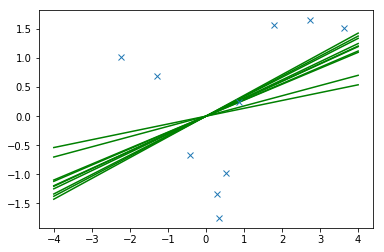

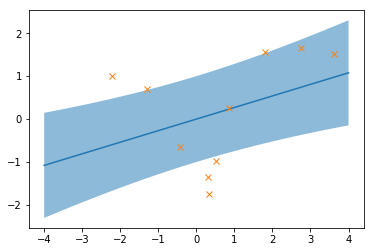

In [5]:
fx = np.linspace(-4, 4, 100)
for w in post_w:
    plt.plot(fx, w*fx, "g")
plt.plot(x_tr, y_tr, "x")
plt.show()

prm = mean_w*fx
prvar =  var_w * fx**2 + 1/beta
prstd = np.sqrt(prvar)
plt.plot(fx, prm)
plt.fill_between(fx, prm + 2*prstd, prm-2*prstd, alpha = 0.5)
plt.plot(x_tr, y_tr, "x")
plt.show()

*******
Not so good... Let us now try some transformations

In [6]:
def loglik(mu, var, y):
    return (-0.5)*(np.log((2*np.pi)**(y.shape[0])*np.linalg.det(var)) + (y-mu).T @ np.linalg.inv(var) @ (y-mu))

In [19]:
K = [1, 2, 3, 4]

for k in K:
    X = np.asarray([1 for i in range(len(x_tr))])
    for i in range(1, k+1):
        X = np.vstack((X, x_tr**i))

    X = X.T
    
    var_w = np.linalg.inv(beta*X.T @ X + np.eye(k+1))
    mean_w = beta*var_w @ X.T @ y_tr

    post_w = np.random.multivariate_normal(mean_w, var_w, 10)

    fX = np.asarray([1 for i in range(len(fx))])
    for i in range(1, k+1):
        fX = np.vstack((fX, fx**i))

    fX = fX.T
    
#     plt.figure()
    
#     for i in range(post_w.shape[0]):
#         plt.plot(fx, fX @ post_w[i])

#     plt.plot(x_tr, y_tr, "rx", label="Training Examples")
#     plt.legend()
#     plt.xlabel("x")
#     plt.ylabel("y")
#     plt.title("10 Random functions with k = %d" % k)
#     plt.savefig("random"+str(k)+".png")
    
#     plt.figure()
    
#     predm = fX @ mean_w
#     plt.plot(fx, predm, label = "Posterior pred mean")
#     plt.plot(x_tr, y_tr, "x", label = "Training examples")
    predvar = fX @ var_w @ fX.T + 1/beta*np.eye(np.shape(fX)[0]) 
    predstd = np.sqrt(np.diagonal(predvar))
#     plt.fill_between(fx, predm + 2*predstd, predm - 2*predstd, alpha = 0.5)
#     plt.legend()
#     plt.xlabel("x")
#     plt.ylabel("y")
#     plt.title("Posterior predictive with k = %d" % k)
#     plt.savefig("postpred"+str(k)+".png")

    #marginal log likeli - 
    #print("Marginal logli with k = ", k , loglik(0, 1/beta*np.eye(np.shape(X)[0]) + X @ X.T, y_tr))
    if k == 3:
        print(np.argmax(predstd))
    #log likeli with w_map = mean_w
    #print(loglik(X @ mean_w, 1/beta*np.eye(np.shape(X)[0]), y_tr))

0
